In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# RandomForest, SVM, Logistic Regresssion
from sklearn.ensemble import RandomForestClassifier #ensemble bagging algorithm (base model1)
from sklearn.svm import SVC #(base model 2)
from sklearn.linear_model import LogisticRegression #(base model 3)

from sklearn.ensemble import VotingClassifier

# meta model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# generate our data
X, y = make_moons(n_samples=600, noise=.3, random_state=40)

Text(0, 0.5, 'Feature 2')

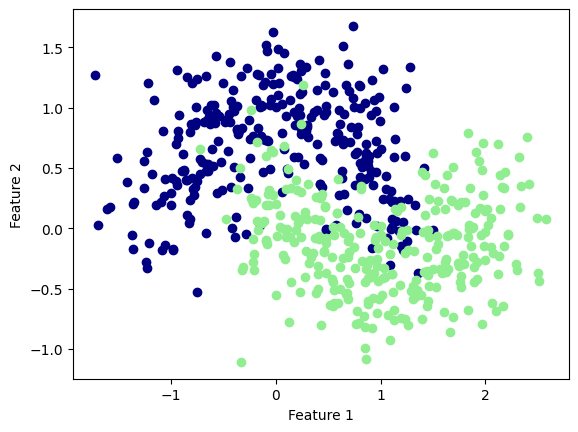

In [3]:
# plot the data
plt.scatter(x=X[y==0][:,0], y=X[y==0][:,1], c='navy')
plt.scatter(x=X[y==1][:,0], y=X[y==1][:,1], c='lightgreen')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=40)

In [17]:
# define base model classifiers
log_reg = LogisticRegression(solver='lbfgs', random_state=40)
rnd_for = RandomForestClassifier(n_estimators=100, random_state=40)
svm_cl = SVC(gamma='scale', random_state=40, probability=True)

In [18]:
# alternative libraries for the classifiers above

# keras random forest
#tfdf.keras.RandomForestModel 

#tensorflow_decision_forests

#tfdf.keras.GradientBoostedTreesModel

# there are also linear classification models in Keras and TF

In [19]:
# define our meta model using NN

# package all NN steps into one function

def my_nn():
    model = Sequential(
                    [Dense(60, activation='relu', input_shape=[2]),
                    Dense(1, activation='sigmoid')
                        ])
    
    model.compile(
                optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
                )
    
    return model

`pip install scikeras`

`scikeras.wrappers` it builds a bridge between Sk Learn and Keras/TensorFlow. it allows the user to deploy Keras/TF models as an SKLearn estimator (easy integration)

In [20]:
from scikeras.wrappers import KerasClassifier #for regression use KerasRegressor

keras_nn = KerasClassifier(my_nn, epochs=400)

In [21]:
# classification model indication
keras_nn._estimator_type = 'classifier'

In [22]:
# assemble all models (base and meta) with voting mechanism

voter = VotingClassifier(
                    estimators=[
                        ('lr', log_reg),
                        ('rf', rnd_for),
                        ('svc', svm_cl),
                        ('keras', keras_nn)
                        ],
                    voting='soft',
                    flatten_transform=True
                    )

- `soft` voting means applying an activation function (argmax) on the sums of the predicted probabilities (always recommended)
- `hard` voting means choosing the majority rule voting

In [23]:
# we're ready for training our model
voter.fit(X_train, y_train)

Epoch 1/400
15/15 [==============================] - 0s 566us/step - loss: 0.6741 - accuracy: 0.5156
Epoch 2/400
15/15 [==============================] - 0s 510us/step - loss: 0.6250 - accuracy: 0.7622
Epoch 3/400
15/15 [==============================] - 0s 430us/step - loss: 0.5837 - accuracy: 0.7933
Epoch 4/400
15/15 [==============================] - 0s 481us/step - loss: 0.5491 - accuracy: 0.8022
Epoch 5/400
15/15 [==============================] - 0s 465us/step - loss: 0.5176 - accuracy: 0.8111
Epoch 6/400
15/15 [==============================] - 0s 448us/step - loss: 0.4923 - accuracy: 0.8156
Epoch 7/400
15/15 [==============================] - 0s 344us/step - loss: 0.4682 - accuracy: 0.8178
Epoch 8/400
15/15 [==============================] - 0s 353us/step - loss: 0.4474 - accuracy: 0.8222
Epoch 9/400
15/15 [==============================] - 0s 344us/step - loss: 0.4305 - accuracy: 0.8267
Epoch 10/400
15/15 [==============================] - 0s 326us/step - loss: 0.4164 - accura

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=40)),
                             ('rf', RandomForestClassifier(random_state=40)),
                             ('svc', SVC(probability=True, random_state=40)),
                             ('keras',
                              KerasClassifier(epochs=400, model=<function my_nn at 0x2c941fba0>))],
                 voting='soft')

Let's evaluate the performance of 1 model runing by itself vs the sacked model

In [24]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8933333333333333

In [25]:
#voter.fit(X_train, y_train)
y_pred = voter.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

5/5 [==============================] - 0s 502us/step
0.9333333333333333


In [34]:
score_list = []
for model_name in [log_reg,
                    rnd_for,
                    svm_cl,
                    keras_nn,
                    voter
                    ]:
    
    model_name.fit(X_train, y_train)
    y_pred = model_name.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    score_list.append(acc_score)
    

Epoch 1/400
15/15 [==============================] - 0s 540us/step - loss: 0.6584 - accuracy: 0.6622
Epoch 2/400
15/15 [==============================] - 0s 489us/step - loss: 0.5964 - accuracy: 0.8378
Epoch 3/400
15/15 [==============================] - 0s 443us/step - loss: 0.5486 - accuracy: 0.8289
Epoch 4/400
15/15 [==============================] - 0s 442us/step - loss: 0.5122 - accuracy: 0.8289
Epoch 5/400
15/15 [==============================] - 0s 433us/step - loss: 0.4825 - accuracy: 0.8311
Epoch 6/400
15/15 [==============================] - 0s 466us/step - loss: 0.4598 - accuracy: 0.8378
Epoch 7/400
15/15 [==============================] - 0s 398us/step - loss: 0.4402 - accuracy: 0.8467
Epoch 8/400
15/15 [==============================] - 0s 406us/step - loss: 0.4237 - accuracy: 0.8422
Epoch 9/400
15/15 [==============================] - 0s 408us/step - loss: 0.4100 - accuracy: 0.8422
Epoch 10/400
15/15 [==============================] - 0s 462us/step - loss: 0.3996 - accura

In [31]:
model_list = ['log_reg',
            'rnd_for',
            'svm_cl',
            'keras_nn',
            'voter']
score_list

[0.8933333333333333,
 0.9133333333333333,
 0.9266666666666666,
 0.9266666666666666,
 0.9266666666666666]

In [36]:
data = {'models':model_list, 'scores':score_list, 'type':['base','base','base','meta','stacked']}
import pandas as pd
pd.DataFrame(data)

,models,scores,type
0,log_reg,0.893333,base
1,rnd_for,0.913333,base
2,svm_cl,0.926667,base
3,keras_nn,0.920000,meta
4,voter,0.933333,stacked
